In [ ]:
!pip install pypianoroll

     |████████████████████████████████| 5.6MB 4.5MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
  Created wheel for pypianoroll: filename=pypianoroll-0.5.3-cp36-none-any.whl size=23829 sha256=519a332cf195919880261bd121094e01a47b7f672fa86a265e8455fbe4a1a1c7
  Stored in directory: /root/.cache/pip/wheels/29/c8/c0/7b240ab723c2f96b03391796bdf278de513eabf1dfb989c07f
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-cp36-none-any.whl size=5591954 sha256=aac17b889bc506cb16808c2a417d383cc5065b5f3fc2afeb9db96726a2db1a5f
  Stored in directory: /root/.cache/pip/wheels/4c/a1/c6/b5697841db1112c6e5866d75a6b6bf1bef73b874782556ba66
Successfully built pypianoroll pretty-midi


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pypianoroll
from pypianoroll import Multitrack,Track

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2580480/45929032 bytes (5.6%)6782976/45929032 bytes (14.8%)10821632/45929032 bytes (23.6%)14925824/45929032 bytes (32.5%)19095552/45929032 bytes (41.6%)23306240/45929032 bytes (50.7%)27475968/45929032 bytes (59.8%)31580160/45929032 bytes (68.8%)35864576/45929032 bytes (78.1%)40165376/45929032 bytes (87.5%)44392448/45929032 bytes (96.7%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [ ]:
!cd drive/My\ Drive

/bin/bash: line 0: cd: drive/My Drive: No such file or directory


In [ ]:
#ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#音楽データへのパス
filename1 = "drive/My Drive/music/dataset/gurenge.mid"
filename2 = "drive/My Drive/music/dataset/prime_c.mid"
filename3 = "drive/My Drive/music/dataset/secretbase_c.mid"
filename4 = "drive/My Drive/music/dataset/utautai.mid"
filename5 = "drive/My Drive/music/dataset/togetsukyo.mid"

In [ ]:
#120でロードする。試しに作ったやつたちは直接書いた。
filename6 = "drive/My Drive/music/dataset/gurenge120.mid"
filename7 = "drive/My Drive/music/dataset/prime_c120.mid"
filename8 = "drive/My Drive/music/dataset/secretbase_c120.mid"
filename9 = "drive/My Drive/music/dataset/utautai120.mid"
filename10 = "drive/My Drive/music/dataset/togetsukyo120.mid"

In [ ]:
#クラシックデータ
#ヴェートーヴぇん
#一回やればもうやらない
load_120("drive/My Drive/music/dataset/be-menuett.mid","be-menuett120.mid")
load_120("drive/My Drive/music/dataset/choral.mid","choral120.mid")
load_120("drive/My Drive/music/dataset/ecossaisen.mid","ecossaisen120.mid")
load_120("drive/My Drive/music/dataset/elise.mid","elise120.mid")
load_120("drive/My Drive/music/dataset/pathetique.mid","pathetique120.mid")
load_120("drive/My Drive/music/dataset/sonatine.mid","sonatine120.mid")
load_120("drive/My Drive/music/dataset/tempest.mid","tempest120.mid")
load_120("drive/My Drive/music/dataset/unmei.mid","unmei120.mid")

2
2
2
2
2
2
2
2


In [ ]:
v1 = cut_pianoroll("drive/My Drive/music/dataset/be-menuett120.mid",64,96)
v2 = cut_pianoroll("drive/My Drive/music/dataset/choral120.mid",64,96)
v3 = cut_pianoroll("drive/My Drive/music/dataset/ecossaisen120.mid",64,96)
v4 = cut_pianoroll("drive/My Drive/music/dataset/elise120.mid",64,96)
v5 = cut_pianoroll("drive/My Drive/music/dataset/pathetique120.mid",64,96)
v6 = cut_pianoroll("drive/My Drive/music/dataset/sonatine120.mid",64,96)
v7 = cut_pianoroll("drive/My Drive/music/dataset/tempest120.mid",64,96)
v8 = cut_pianoroll("drive/My Drive/music/dataset/unmei120.mid",64,96)

(1180, 128) (118, 128)
(3080, 128) (308, 128)
(1590, 128) (159, 128)
(1640, 128) (164, 128)
(3460, 128) (346, 128)
(2310, 128) (231, 128)
(2690, 128) (269, 128)
(3200, 128) (320, 128)


In [ ]:
#ピアノロールの可視化
def print_pianoroll(mididata):
  # Create a pianoroll matrix, where the first and second axes represent time
  # and pitch, respectively, and assign a C major chord to the pianoroll
  # Create a `pypianoroll.Track` instance
  track = Track(pianoroll=mididata, program=0, is_drum=False,
              name='my awesome piano')
  # Plot the pianoroll
  fig, ax = track.plot()
  plt.show()

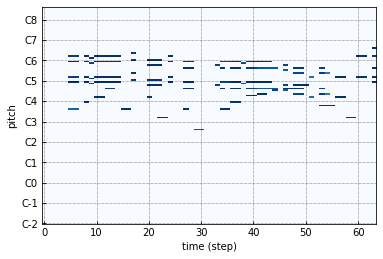

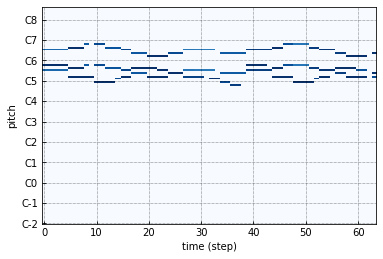

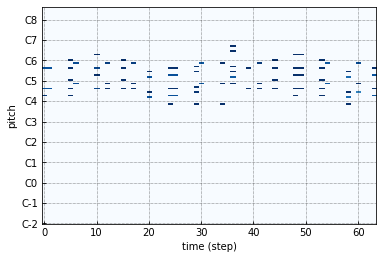

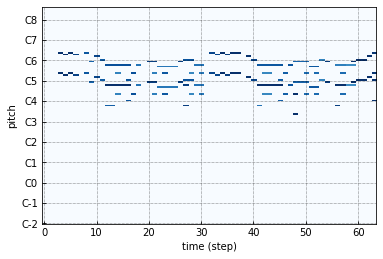

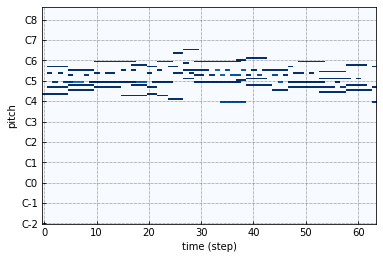

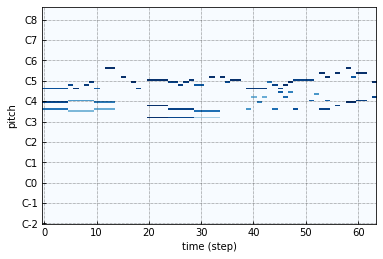

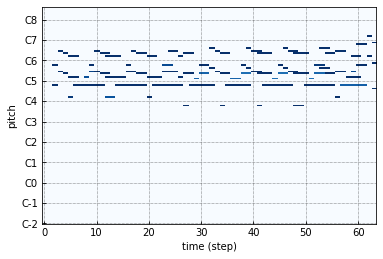

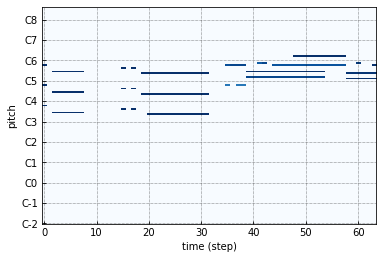

In [ ]:
#ヴェートーヴぇん可視化
#圧縮したやつにしてしまった
print_pianoroll(v1)
print_pianoroll(v2)
print_pianoroll(v3)
print_pianoroll(v4)
print_pianoroll(v5)
print_pianoroll(v6)
print_pianoroll(v7)
print_pianoroll(v8)

In [ ]:
#midiデータをテンポ120で保存　
#filename : データへのパス
#outputname : "曲名"120.midi
def load_120 (filename,outputname):
  pianoroll = pypianoroll.parse(filename, beat_resolution=24, name='unknown')
  midi_data = pianoroll.get_merged_pianoroll()
  midi_data = np.array(midi_data)
  #1 = a1[time_start:time_end, :]
  np.shape(midi_data) #サイズ確認
  output_data = midi_data
  multi = pypianoroll.Multitrack()
  track = Track(pianoroll=output_data, program=0, is_drum=False,name='my awesome piano')
  print(track.pianoroll.ndim)
  another_track = track.copy()
  multitrack = Multitrack(tracks=[track, another_track], tempo=120.0)
  multitrack.write(outputname)


In [ ]:
# 学習モデルへのデータ整形
#midi120データ,音楽の長さ, 元データ冗長省略時間
def cut_pianoroll(midi_data120, time_length, time_start):
  #time_start = 96 #無音の部分を抽出しないためのチェックポイント
  #time_length = 64
  
  pianoroll = pypianoroll.parse(midi_data120, beat_resolution=24, name='unknown')
  a = pianoroll.get_merged_pianoroll()
  a = np.array(a)
  np.shape(a) #元データ120テンポをnumpy行列化
  a_index = []
  a_index2 = []
  aa = a[time_start:] 
  #データを圧縮
  for i in range(len(aa)):
    if i % 10 == 0:
      s = aa[i]
      s = np.reshape(s, (1, 128))
      a_index2.append(s)
      ss = np.concatenate([s]*10, 0)
      a_index.append(ss)
      a_index_new = np.concatenate(a_index, 0)
      a_index2_new = np.concatenate(a_index2, 0)


  print(np.shape(a_index_new), np.shape(a_index2_new))
  return a_index2_new[:time_length]

In [ ]:
# ニューラルネットワークの出力をmidiファイル出力
# 出力ファイル名.midi , outputdata
def create_midi(create_file,output,time_step):
  index = []
  output = np.transpose(output)
  output = output * 180

  print(np.shape(output))
  for i in range(time_step):
    s = output[i]
    s = np.reshape(s, (1, 128))
    ss = np.concatenate([s]*10, 0)
    index.append(ss)

  index = np.concatenate(index, 0)
  np.shape(index)
  output_data = index
  multi = pypianoroll.Multitrack()
  track = Track(pianoroll=output_data, program=0, is_drum=False,name='my awesome piano')
  print(track.pianoroll.ndim)
  another_track = track.copy()
  multitrack = Multitrack(tracks=[track, another_track], tempo=120.0)
  multitrack.write(create_file)
  print("Create new midi_file")

In [ ]:
a1 = cut_pianoroll(filename6,64,96)
a2 = cut_pianoroll(filename7,64,96)
a3 = cut_pianoroll(filename8,64,96)

(8210, 128) (821, 128)
(3170, 128) (317, 128)
(8790, 128) (879, 128)


In [ ]:
#データセット用意
dataset = [v1,v2,v3,v4,v5,v6,v7,v8]
#ある程度小さい値に落とし込む
DataSet = []
for a in dataset:
  a = a / 180
  DataSet.append(a)

#正規化確認
for a in dataset:
  print(np.shape(a))
  a1 = np.max(a)
  print(a1)

(64, 128)
248
(64, 128)
220
(64, 128)
220
(64, 128)
148
(64, 128)
212
(64, 128)
152
(64, 128)
188
(64, 128)
252


In [ ]:
ss = torch.randint(222, (1, 7))
em = nn.Embedding(222, 30)
ss = em(ss)
print(ss.size())
a = torch.rand((1, 32, 128))
lstm = nn.LSTM(128, 128, 3, batch_first=True)
o, (h, c) = lstm(a)
o, (h, c) = lstm(o, (h, c))
print(o.size(), h.size(), c.size())

pitch_size = 128
n_layers = 2
time_step = 64

torch.Size([1, 7, 30])
torch.Size([1, 32, 128]) torch.Size([3, 1, 128]) torch.Size([3, 1, 128])


In [ ]:
pitch_size = 128
n_layers = 2
class LSTM(nn.Module):
  def __init__(self):
    super(LSTM, self).__init__()

    self.lstm = nn.LSTM(pitch_size, pitch_size, n_layers, batch_first=True)
    self.softplus = nn.Softplus()
  def forward(self, x, hidden_state, cell, target, teacher_forcing, length):
    components = []
    for i in range(length - 1):
      if i != 0:
        if teacher_forcing:
          x = target[:,i,:]
          x = x.unsqueeze(0)
      x, (hidden_state, cell) = self.lstm(x, (hidden_state, cell))
      components.append(x)
    components = torch.cat(components, 0)
    components = components.squeeze(1)
      
    
    return components

model = LSTM()
model = model.cuda()

In [ ]:
#誤差関数の設定
criterion = nn.MSELoss()

In [ ]:
#最適化手法の定義
import torch.optim as optim
optimizer = optim.Adam(model.parameters(),
                                lr=0.01)

In [ ]:
#訓練、テストの設定
device = torch.device('cpu')

def train(x_train):
  model.train()
  optimizer.zero_grad()
  
  hidden_state = torch.zeros(n_layers, 1, 128)
  hidden_state = hidden_state.cuda()
  cell = torch.zeros(n_layers, 1, 128)
  cell = cell.cuda()
  x = x_train[:,0,:].unsqueeze(0)

  random = np.random.rand(1, )
  if random > 1.0:
    teacher_forcing = False
  else:
    teacher_forcing = True
  components = model(x, hidden_state, cell, x_train, teacher_forcing, time_step)

  print(components.size())
  print(x_train[:,1:,:].size())
  loss = criterion(components, x_train[:,1:,:].squeeze(0))
  loss.backward()
  optimizer.step()
  return loss.item()

def test(length):
  model.eval()

  hidden_state = torch.zeros(n_layers, 1, 128)
  hidden_state = hidden_state.cuda()
  cell = torch.zeros(n_layers, 1, 128)
  cell = cell.cuda()
  
  x = DataSet[4]
  sample_n = np.random.choice(list(range(time_step)), 1)
  sample = x[sample_n]
  sample = torch.FloatTensor(sample).cuda().unsqueeze(0).unsqueeze(0)
  components = model(x, hidden_state, cell, cell, False, length)

  components = components.to(device)
  components = torch.t(components)
  components = components.detach().clone().numpy()

  return components

def test2(x_train, time_step):
  model.eval()

  hidden_state = torch.zeros(n_layers, 1, 128)
  hidden_state = hidden_state.cuda()
  cell = torch.zeros(n_layers, 1, 128)
  cell = cell.cuda()
  sample_n = np.random.choice(list(range(time_step)), 1)
  x = x_train[:,sample_n,:]
  print(x.size())

  random = np.random.rand(1, )
  if random > 1.0:
    teacher_forcing = False
  else:
    teacher_forcing = True
  components = model(x, hidden_state, cell, x_train, False, time_step)

  components = components.to(device)
  components = torch.t(components)
  components = components.detach().clone().numpy()
  
  return components

In [ ]:
epochs = 1000
train_history = []

for epoch in range(epochs):
  num_list = list(range(8))
  n = np.random.choice(num_list)
  print(n)
  x_train = torch.from_numpy(DataSet[n])
  x_train = x_train.cuda()
  x_train = x_train.float()
  x_train = x_train.view(1, time_step, 128)
  train_loss = train(x_train)
  train_history.append(train_loss)

  print(f'[Epoch {epoch+1:3d}/{epochs:3d}]' \
          f' train_loss: {train_loss:.5f}')

0
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch   1/1000] train_loss: 0.01365
4
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch   2/1000] train_loss: 0.02339
0
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch   3/1000] train_loss: 0.01062
3
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch   4/1000] train_loss: 0.00697
1
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch   5/1000] train_loss: 0.00959
5
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch   6/1000] train_loss: 0.00597
4
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch   7/1000] train_loss: 0.02056
6
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch   8/1000] train_loss: 0.01339
1
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch   9/1000] train_loss: 0.00866
3
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch  10/1000] train_loss: 0.00659
6
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoch  11/1000] train_loss: 0.01182
2
torch.Size([63, 128])
torch.Size([1, 63, 128])
[Epoc

torch.Size([1, 1, 128])


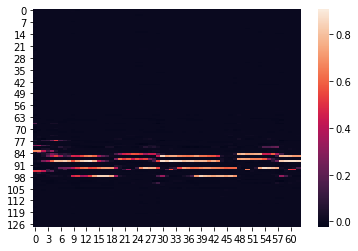

In [ ]:
#学習させたモデルに入力を
x_train = torch.from_numpy(DataSet[4])
x_train = x_train.cuda()
x_train = x_train.float()
x_train = x_train.view(1, time_step, 128)
steps = 64
out = test2(x_train, steps)
np.shape(out)
mat = np.transpose(DataSet[4])
mat = out
sns.heatmap(mat)
#print_pianoroll(out)


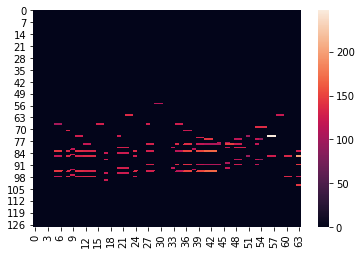

In [ ]:
mat = np.transpose(v1)

sns.heatmap(mat)


In [ ]:
#結果ファイル出力
outtime = 63
output = out
create_midi("vetoven2.midi",output,outtime)

(63, 128)
2
Create new midi_file


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
class LSTM(nn.Module):
  def __init__(self):
    super(LSTM, self).__init__()

    self.lstm = nn.LSTM(pitch_size, pitch_size, n_layers, batch_first=True)
    self.softplus = nn.Softplus()
  def forward(self, x, hidden_state, cell, target, teacher_forcing):
    components = []
    for i in range(time_step):
      if i != 0:
        if teacher_forcing:
          x = target[:,i-1,:]
          x = x.unsqueeze(0)
      x, (hidden_state, cell) = self.lstm(x, (hidden_state, cell))
      components.append(x)
    components = torch.cat(components, 0)
    components = components.squeeze(1)
      #x = self.softplus(x)
    
    return components


model = LSTM()
model = model.cuda()
#誤差関数の設定
criterion = nn.MSELoss()
#最適化手法の定義
optimizer = optim.Adam(model.parameters(),
                                lr=0.002)
#訓練、テストの設定
device = torch.device('cpu')

def train(x_train):
  model.train()
  optimizer.zero_grad()
  hidden_state = torch.zeros(n_layers, 1, 128)
  hidden_state = hidden_state.cuda()
  cell = torch.zeros(n_layers, 1, 128)
  cell = cell.cuda()
  x_train = x_train.cuda()
  x = torch.zeros(1, 1, 128).cuda()
  print(x_train.size())
  components = model(x, hidden_state, cell, x_train, True)

  loss = criterion(components, x_train)
  loss.backward()
  optimizer.step()
  return loss.item()

def test():
  model.eval()

  hidden_state = torch.zeros(n_layers, 1, 128)
  hidden_state = hidden_state.cuda()
  cell = torch.zeros(n_layers, 1, 128)
  cell = cell.cuda()

  x = torch.zeros(1, 1, 128).cuda()
  components = model(x, hidden_state, cell, cell, False)

  components = components.to(device)
  components = torch.t(components)
  components = components.detach().clone().numpy()

  return components

epochs = 800
train_history = []

for epoch in range(epochs):
  n = np.random.randint(0, 3)
  a = np.array(dataset[n],dtype ="float64")
  x_train = torch.from_numpy(a)
  x_train = x_train.cuda()
  x_train = x_train.float()
  x_train = x_train.view(1, time_step, 128)
  train_loss = train(x_train)
  train_history.append(train_loss)

  print(f'[Epoch {epoch+1:3d}/{epochs:3d}]' \
          f' train_loss: {train_loss:.5f}')

In [ ]:
model = LSTM()
model = model.cuda()
#誤差関数の設定
criterion = nn.MSELoss()
#最適化手法の定義
optimizer = optim.Adam(model.parameters(),
                                lr=0.001)
#訓練、テストの設定
device = torch.device('cpu')

Tue Sep  1 12:19:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |    927MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

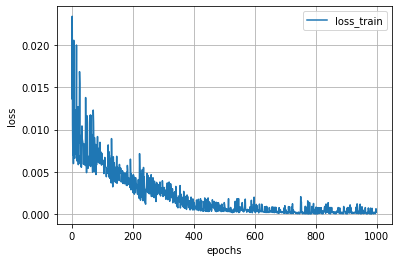

In [ ]:
!nvidia-smi

plt.plot(train_history, label='loss_train', marker='None')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()